# STOCK MARKET PREDICTION

## IMPORTING THE LIBRARIES
- **numpy** for numerical operations
- **pandas** data manipulation and analysis
- **yfinance** for downloading stock data
- **matplotlib.pyplot** for plotting graphs

In [35]:
import numpy as np
import pandas as pd

# Import YFinance Library
import yfinance as yf

# Download Stock Prices for Training and Testing from YFinance

## 1) Download Stock Data for Training (train_df)

In [36]:
# Download Stock Prices

# Ticker and start date, end date for Training 
stock_symbol = 'ICICIBANK.NS'
train_start_date = '2024-02-09'
train_end_date = '2024-03-01'

# Download Stock Price Data from Yahoo Finance
train_df = yf.download(stock_symbol, start=train_start_date, end=train_end_date, progress=False)
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-09,988.849976,1013.750000,985.500000,1010.700012,1010.700012,12799837
2024-02-12,1010.400024,1012.200012,985.250000,996.099976,996.099976,8050066
2024-02-13,1006.000000,1027.050049,1000.299988,1019.799988,1019.799988,18706292
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395
2024-02-19,1023.349976,1046.000000,1023.349976,1043.750000,1043.750000,9388255
2024-02-20,1041.050049,1052.650024,1033.250000,1048.750000,1048.750000,11293528
2024-02-21,1056.800049,1064.000000,1048.000000,1051.949951,1051.949951,15946325


## 2) Downloading Stock Data for Testing (test_df)

In [37]:
# Download Stock Data from Predicting

# Ticker and start date, end date for Predicting 
test_start_date = '2024-03-01'
test_end_date = '2024-03-16'

# Download Stock Price Data from Yahoo Finance
test_df = yf.download(stock_symbol, start=test_start_date, end=test_end_date, progress=False)
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01  1055.000000  1089.949951  1054.000000  1086.900024  1086.900024   
2024-03-04  1081.000000  1095.000000  1080.099976  1092.349976  1092.349976   
2024-03-05  1086.199951  1099.500000  1076.500000  1088.050049  1088.050049   
2024-03-06  1080.300049  1113.550049  1080.300049  1097.099976  1097.099976   
2024-03-07  1094.949951  1095.000000  1082.699951  1087.949951  1087.949951   
2024-03-11  1087.949951  1087.949951  1076.750000  1078.699951  1078.699951   
2024-03-12  1077.050049  1094.800049  1055.650024  1076.849976  1076.849976   
2024-03-13  1077.150024  1089.650024  1073.150024  1083.949951  1083.949951   
2024-03-14  1080.000000  1097.099976  1075.050049  1083.599976  1083.599976   
2024-03-15  1072.000000  1086.250000  1070.000000  1080.349976  1080.349976   

              Volume  
Date                  
2024-

## Extracting Working Days for which we want to predict the stock prices

In [38]:
# Extract dates to predict
prediction_dates = test_df.index
print(prediction_dates)

DatetimeIndex(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


## Extracting Close Prices from Training Data

In [39]:
# Extract Close Price from Training data
prices_to_train = train_df[['Close', 'Open', 'Low', 'High']].to_numpy()
print(prices_to_train)

[[1010.70001221  988.84997559  985.5        1013.75      ]
 [ 996.09997559 1010.40002441  985.25       1012.20001221]
 [1019.79998779 1006.         1000.29998779 1027.05004883]
 [1022.70001221 1009.54998779 1007.54998779 1035.69995117]
 [1016.65002441 1022.84997559 1006.59997559 1026.65002441]
 [1023.25       1023.20001221 1016.90002441 1026.19995117]
 [1043.75       1023.34997559 1023.34997559 1046.        ]
 [1048.75       1041.05004883 1033.25       1052.65002441]
 [1051.94995117 1056.80004883 1048.         1064.        ]
 [1062.69995117 1056.         1040.30004883 1066.        ]
 [1061.30004883 1070.         1057.65002441 1070.        ]
 [1054.19995117 1053.09997559 1050.5        1062.30004883]
 [1060.19995117 1050.75       1046.5        1066.19995117]
 [1046.19995117 1063.         1042.15002441 1064.84997559]
 [1052.19995117 1043.05004883 1038.5        1060.69995117]]


In [40]:
from sklearn.feature_selection import f_regression

# Calculate TRANGE values
trange = train_df['High'] - train_df['Low']
trange_array = trange.to_numpy().reshape(-1, 1)

# Calculate ATR values
period = 5
atr = trange.rolling(window=period, min_periods=1).mean()
atr_array = atr.to_numpy().reshape(-1, 1)

# Calculate NATR values
natr = atr / train_df['Close'] * 100
natr_array = natr.to_numpy().reshape(-1, 1)

print(trange_array)
print(atr_array)
print(natr_array)

# Add values as a column at the end of the numpy array
prices_to_train = np.hstack((prices_to_train, trange_array, atr_array, natr_array))

print(prices_to_train)

[[28.25      ]
 [26.95001221]
 [26.75006104]
 [28.14996338]
 [20.05004883]
 [ 9.29992676]
 [22.65002441]
 [19.40002441]
 [16.        ]
 [25.69995117]
 [12.34997559]
 [11.80004883]
 [19.69995117]
 [22.69995117]
 [22.19995117]]
[[28.25      ]
 [27.6000061 ]
 [27.31669108]
 [27.52500916]
 [26.03001709]
 [22.24000244]
 [21.38000488]
 [19.90999756]
 [17.48000488]
 [18.60998535]
 [19.21999512]
 [17.05      ]
 [17.10998535]
 [18.44997559]
 [17.74997559]]
[[2.79509248]
 [2.77080682]
 [2.67863222]
 [2.69140597]
 [2.56037146]
 [2.17346713]
 [2.0483837 ]
 [1.8984503 ]
 [1.66167648]
 [1.75119848]
 [1.81098598]
 [1.61734024]
 [1.61384514]
 [1.76352289]
 [1.6869394 ]]
[[1010.70001221  988.84997559  985.5        1013.75         28.25
    28.25          2.79509248]
 [ 996.09997559 1010.40002441  985.25       1012.20001221   26.95001221
    27.6000061     2.77080682]
 [1019.79998779 1006.         1000.29998779 1027.05004883   26.75006104
    27.31669108    2.67863222]
 [1022.70001221 1009.54998779 1007

In [41]:
# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(prices_to_train, columns=['Open','High','Low','Close','TRANGE', 'ATR', 'NATR'])
df.index = train_df.index
# Display the DataFrame
print(df)


                   Open         High          Low        Close     TRANGE  \
Date                                                                        
2024-02-09  1010.700012   988.849976   985.500000  1013.750000  28.250000   
2024-02-12   996.099976  1010.400024   985.250000  1012.200012  26.950012   
2024-02-13  1019.799988  1006.000000  1000.299988  1027.050049  26.750061   
2024-02-14  1022.700012  1009.549988  1007.549988  1035.699951  28.149963   
2024-02-15  1016.650024  1022.849976  1006.599976  1026.650024  20.050049   
2024-02-16  1023.250000  1023.200012  1016.900024  1026.199951   9.299927   
2024-02-19  1043.750000  1023.349976  1023.349976  1046.000000  22.650024   
2024-02-20  1048.750000  1041.050049  1033.250000  1052.650024  19.400024   
2024-02-21  1051.949951  1056.800049  1048.000000  1064.000000  16.000000   
2024-02-22  1062.699951  1056.000000  1040.300049  1066.000000  25.699951   
2024-02-23  1061.300049  1070.000000  1057.650024  1070.000000  12.349976   

In [42]:
# Calculate TRANGE values
test_df['TRANGE'] = test_df['High'] - test_df['Low']

# Calculate ATR values
period = 5
test_df['ATR'] = test_df['TRANGE'].rolling(window=period, min_periods=1).mean()

# Calculate NATR values
test_df['NATR'] = test_df['ATR'] / test_df['Close'] * 100

# Print the updated DataFrame with TRANGE, ATR, and NATR features
print(test_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-01  1055.000000  1089.949951  1054.000000  1086.900024  1086.900024   
2024-03-04  1081.000000  1095.000000  1080.099976  1092.349976  1092.349976   
2024-03-05  1086.199951  1099.500000  1076.500000  1088.050049  1088.050049   
2024-03-06  1080.300049  1113.550049  1080.300049  1097.099976  1097.099976   
2024-03-07  1094.949951  1095.000000  1082.699951  1087.949951  1087.949951   
2024-03-11  1087.949951  1087.949951  1076.750000  1078.699951  1078.699951   
2024-03-12  1077.050049  1094.800049  1055.650024  1076.849976  1076.849976   
2024-03-13  1077.150024  1089.650024  1073.150024  1083.949951  1083.949951   
2024-03-14  1080.000000  1097.099976  1075.050049  1083.599976  1083.599976   
2024-03-15  1072.000000  1086.250000  1070.000000  1080.349976  1080.349976   

              Volume     TRANGE        ATR      NAT

## Import Library for Ridge regression model from scikit-learn

In [43]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Initialize an empty dictionary to store predicted prices " predicted_price = {} " ##

In [44]:
rr_predicted_price = {}
svr_predicted_price = {}
knn_predicted_price = {}
dt_predicted_price = {}
rf_predicted_price = {}
ann_predicted_price = {}

# Loop through each date in the "prediction_dates" then train the model and make prediction of next day's closing price and then include this prediction in feature data and remove the oldest one and again trained the model -  #

## 1) Prepare 'features' (every 10 days' closing prices) and 'targets' (next day's closing price) for training the Ridge regression model:

- **features = []** - List to store the features (every 10 days' closing prices)
- **targets = []** - List to store the targets (next day's closing price)
- **for i in range(len(prices_to_train)-10):** - Loop through the training data
- **features.append(prices_to_train.values[i:i+10])** - # Add every 10 days' closing prices to features
- **targets.append(prices_to_train.iloc[i+10])** - # Add the next day's closing price to targets

## 2) Train the Ridge regression model with an alpha value
- **model = Ridge(alpha=10)** -  Create a Ridge regression model with alpha (regularization strength) set to higher values
- **model.fit(features, targets)** - Train the model on the features and targets

## 3) Make predictions for the next day's closing price:
- **last_sequence = features[-1]** -  Get the last 10 days' closing prices
- **last_sequence = last_sequence[1:]** - Remove the first element
- **
last_sequence = np.append(last_sequence, targets[-1]** -  Add the last actual price to the sequenc
- **
predict = model.predict(last_sequence.reshape(1, -1** - # Predict the next day's pri
- **e
predicted_price[date] = predict[** -  # Store the predicted price for the current d

## 4) Update the prices_to_train for the next iteration:
- **prices_to_train = prices_to_train[1:]** - Remove the first element from the training data
- **prices_to_train[date] = predict[-1]** - Add the predicted price to the training data for the next iterationnate

In [45]:
for date in prediction_dates:
    
    train_features = prices_to_train[:-1]
    train_targets = prices_to_train[1:, :4]
    
    print(f"================ Date :  {date} ========================")
    print(f"\n=============== Training Dataset : ===================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(prices_to_train)
    print(f"\n============================================ Features & Targets =====================================================")
    print()
    print("----------------------Features--------------------------- | -----------------------Targets------------------------------")
    for feature, target in zip(train_features, train_targets):
        print(f"{feature} | {target}")
    
    model_rr = Ridge(alpha=10)
    model_rr.fit(train_features, train_targets)

    model_svr = MultiOutputRegressor(SVR(kernel='rbf', C=1e3))
    model_svr.fit(train_features, train_targets)

    model_knn = KNeighborsRegressor(n_neighbors=5)
    model_knn.fit(train_features, train_targets)

    model_dt = DecisionTreeRegressor()
    model_dt.fit(train_features, train_targets)
    
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(train_features, train_targets)

    model_ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
    model_ann.fit(train_features, train_targets)
    
    target_to_predict = prices_to_train[-1]
    
    rr_predict = model_rr.predict(target_to_predict.reshape(1, -1))
    rr_predicted_price[date] = rr_predict[-1]

    svr_predict = model_svr.predict(target_to_predict.reshape(1, -1))
    svr_predicted_price[date] = svr_predict[-1]

    knn_predict = model_knn.predict(target_to_predict.reshape(1, -1))
    knn_predicted_price[date] = knn_predict[-1]

    dt_predict = model_dt.predict(target_to_predict.reshape(1, -1))
    dt_predicted_price[date] = dt_predict[-1]

    rf_predict = model_rf.predict(target_to_predict.reshape(1, -1))
    rf_predicted_price[date] = rf_predict[-1]

    ann_predict = model_ann.predict(target_to_predict.reshape(1, -1))
    ann_predicted_price[date] = ann_predict[-1]
    
    print()
    print("================ Features for Prediction : ==================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(target_to_predict)
    print()

    print("================ Predicted Prices : ========================")
    print("\n---- Close -------- Open -------- Low -------- High ------")
    print(rr_predict)
    print()

    prices_to_train = prices_to_train[1:]
    specific_date_row = test_df.loc[test_df.index == date, ['Close', 'Open', 'Low', 'High', 'TRANGE', 'ATR', 'NATR']].to_numpy()
    # Add the specific_date_row to prices_to_train
    prices_to_train = np.append(prices_to_train, specific_date_row, axis=0)
    

================ Date :  2024-03-01 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[1010.70001221  988.84997559  985.5        1013.75         28.25
    28.25          2.79509248]
 [ 996.09997559 1010.40002441  985.25       1012.20001221   26.95001221
    27.6000061     2.77080682]
 [1019.79998779 1006.         1000.29998779 1027.05004883   26.75006104
    27.31669108    2.67863222]
 [1022.70001221 1009.54998779 1007.54998779 1035.69995117   28.14996338
    27.52500916    2.69140597]
 [1016.65002441 1022.84997559 1006.59997559 1026.65002441   20.05004883
    26.03001709    2.56037146]
 [1023.25       1023.20001221 1016.90002441 1026.19995117    9.29992676
    22.24000244    2.17346713]
 [1043.75       1023.34997559 1023.34997559 1046.           22.65002441
    21.38000488    2.0483837 ]
 [1048.75       1041.05004883 1033.25       1052.65002441   19.40002441
    19.90999756    1.898450

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



================ Features for Prediction : ==================

---- Close -------- Open -------- Low -------- High ------
[1097.09997559 1080.30004883 1080.30004883 1113.55004883   33.25
   26.7749939     2.44052452]

================ Predicted Prices : ========================

---- Close -------- Open -------- Low -------- High ------
[[1112.72835095 1087.63498032 1084.36882897 1121.48194991]]

================ Date :  2024-03-11 00:00:00 ========================

=============== Training Dataset : ===================

---- Close -------- Open -------- Low -------- High ------
[[1023.25       1023.20001221 1016.90002441 1026.19995117    9.29992676
    22.24000244    2.17346713]
 [1043.75       1023.34997559 1023.34997559 1046.           22.65002441
    21.38000488    2.0483837 ]
 [1048.75       1041.05004883 1033.25       1052.65002441   19.40002441
    19.90999756    1.8984503 ]
 [1051.94995117 1056.80004883 1048.         1064.           16.
    17.48000488    1.66167648]
 [1062.69

C:\Users\mansu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# Create a DataFrame from the predicted prices dictionary
rr_predicted_prices = pd.DataFrame(rr_predicted_price.values(), index=rr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
svr_predicted_prices = pd.DataFrame(svr_predicted_price.values(), index=svr_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(svr_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
knn_predicted_prices = pd.DataFrame(knn_predicted_price.values(), index=knn_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(knn_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
dt_predicted_prices = pd.DataFrame(dt_predicted_price.values(), index=dt_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(dt_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
rf_predicted_prices = pd.DataFrame(rf_predicted_price.values(), index=rf_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(rf_predicted_prices)

# Create a DataFrame from the predicted prices dictionary
ann_predicted_prices = pd.DataFrame(ann_predicted_price.values(), index=ann_predicted_price.keys(), columns=['Predicted Close', ' Predicted Open', 'Predicted Low', 'Predicted High'])
print(ann_predicted_prices)

            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01      1051.460703      1053.484248    1038.248952     1062.441284
2024-03-04       992.409589      1061.836710    1040.185252     1018.128679
2024-03-05      1096.270153      1085.642322    1085.029756     1098.386329
2024-03-06      1085.709370      1081.485779    1074.691335     1094.515205
2024-03-07      1112.728351      1087.634980    1084.368829     1121.481950
2024-03-11      1081.227831      1079.189760    1075.230173     1095.234123
2024-03-12      1072.961755      1076.264361    1066.088434     1085.580955
2024-03-13      1077.257507      1077.645178    1069.665636     1087.483329
2024-03-14      1079.732070      1081.499245    1069.333396     1091.973604
2024-03-15      1081.969500      1082.002370    1069.916717     1094.801792
            Predicted Close   Predicted Open  Predicted Low  Predicted High
2024-03-01      1048.713365      1043.199784    1037.069840     1059.755192
2024-03-04  

## Prepare the actual prices DataFrame
- **actual_prices = test_df['Close']** - Get the actual closing prices for the test data

In [47]:
# Actual Prices
actual_prices = test_df[['Close', 'Open', 'Low', 'High']]
print(actual_prices)    

                  Close         Open          Low         High
Date                                                          
2024-03-01  1086.900024  1055.000000  1054.000000  1089.949951
2024-03-04  1092.349976  1081.000000  1080.099976  1095.000000
2024-03-05  1088.050049  1086.199951  1076.500000  1099.500000
2024-03-06  1097.099976  1080.300049  1080.300049  1113.550049
2024-03-07  1087.949951  1094.949951  1082.699951  1095.000000
2024-03-11  1078.699951  1087.949951  1076.750000  1087.949951
2024-03-12  1076.849976  1077.050049  1055.650024  1094.800049
2024-03-13  1083.949951  1077.150024  1073.150024  1089.650024
2024-03-14  1083.599976  1080.000000  1075.050049  1097.099976
2024-03-15  1080.349976  1072.000000  1070.000000  1086.250000


## Combine the actual and predicted prices DataFrames ##
- **result_df = pd.concat([actual_prices, predicted_prices], axis=1)** - Combine actual and predicted prices into a single DataFrame
- **result_df.columns = ['Actual', 'Predicted']** - Rename the columns for clarityrity

In [48]:
# Combine actual_prices and predicted_prices DataFrames
result_df = pd.concat([actual_prices, rr_predicted_prices, svr_predicted_prices, knn_predicted_prices, dt_predicted_prices, rf_predicted_prices, ann_predicted_prices], axis=1)
result_df.columns = ['Actual Close', 'Actual Open', 'Actual Low', 'Actual High', 'RR Predicted Close', 'RR Predicted Open', 'RR Predicted Low', 'RR Predicted High', 'SVR Predicted Close', 'SVR Predicted Open', 'SVR Predicted Low', 'SVR Predicted High', 'KNN Predicted Close', 'KNN Predicted Open', 'KNN Predicted Low', 'KNN Predicted High', 'DT Predicted Close', 'DT Predicted Open', 'DT Predicted Low', 'DT Predicted High', 'RF Predicted Close', 'RF Predicted Open', 'RF Predicted Low', 'RF Predicted High', 'ANN Predicted Close', 'ANN Predicted Open', 'ANN Predicted Low', 'ANN Predicted High']
print(result_df)

            Actual Close  Actual Open   Actual Low  Actual High  \
2024-03-01   1086.900024  1055.000000  1054.000000  1089.949951   
2024-03-04   1092.349976  1081.000000  1080.099976  1095.000000   
2024-03-05   1088.050049  1086.199951  1076.500000  1099.500000   
2024-03-06   1097.099976  1080.300049  1080.300049  1113.550049   
2024-03-07   1087.949951  1094.949951  1082.699951  1095.000000   
2024-03-11   1078.699951  1087.949951  1076.750000  1087.949951   
2024-03-12   1076.849976  1077.050049  1055.650024  1094.800049   
2024-03-13   1083.949951  1077.150024  1073.150024  1089.650024   
2024-03-14   1083.599976  1080.000000  1075.050049  1097.099976   
2024-03-15   1080.349976  1072.000000  1070.000000  1086.250000   

            RR Predicted Close  RR Predicted Open  RR Predicted Low  \
2024-03-01         1051.460703        1053.484248       1038.248952   
2024-03-04          992.409589        1061.836710       1040.185252   
2024-03-05         1096.270153        1085.642322

In [49]:
print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual Open', 'RR Predicted Open', 'SVR Predicted Open', 'KNN Predicted Open', 'DT Predicted Open', 'RF Predicted Open', 'ANN Predicted Open'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Open'], row['RR Predicted Open'], row['SVR Predicted Open'], row['KNN Predicted Open'], row['DT Predicted Open'], row['RF Predicted Open'], row['ANN Predicted Open']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}  |  {:<15}".format('Actual High', 'RR Predicted High', 'SVR Predicted High', 'KNN Predicted High', 'DT Predicted High', 'RF Predicted High', 'ANN Predicted High'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual High'], row['RR Predicted High'], row['SVR Predicted High'], row['KNN Predicted High'], row['DT Predicted High'], row['RF Predicted High'], row['ANN Predicted High']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}   |  {:<15}".format('Actual Low', 'RR Predicted Low', 'SVR Predicted Low', 'KNN Predicted Low', 'DT Predicted Low', 'RF Predicted Low', 'ANN Predicted Low'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Low'], row['RR Predicted Low'], row['SVR Predicted Low'], row['KNN Predicted Low'], row['DT Predicted Low'], row['RF Predicted Low'], row['ANN Predicted Low']))

print("========================================================================================================================================================")
# Print table header
print("{:<15}   |  {:<15} |  {:<15} |  {:<15} |  {:<15} |  {:<15}  | {:<15}".format('Actual Close', 'RR Predicted Close', 'SVR Predicted Close', 'KNN Predicted Close', 'DT Predicted Close', 'RF Predicted Close', 'ANN Predicted Close'))
print("========================================================================================================================================================")
# Print table rows
for index, row in result_df.iterrows():
    print("{:<15.8f}   |   {:<15.8f}   |   {:<15.8f}    |    {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}   |   {:<15.8f}".format(row['Actual Close'], row['RR Predicted Close'], row['SVR Predicted Close'], row['KNN Predicted Close'], row['DT Predicted Close'], row['RF Predicted Close'], row['ANN Predicted Close']))

Actual Open       |  RR Predicted Open  |  SVR Predicted Open  |  KNN Predicted Open  |  DT Predicted Open  |  RF Predicted Open  |  ANN Predicted Open
1055.00000000     |   1053.48424774     |   1043.19978412      |    1059.31000977     |   1063.00000000     |   1055.89751343     |   1055.25703702  
1081.00000000     |   1061.83670954     |   1061.48159010      |    1058.56999512     |   1070.00000000     |   1046.44750427     |   1077.83510714  
1086.19995117     |   1085.64232249     |   1068.45717789      |    1063.56999512     |   1056.80004883     |   1060.34399719     |   1152.55008335  
1080.30004883     |   1081.48577908     |   1076.55213578      |    1070.65998535     |   1086.19995117     |   1078.89746948     |   1117.53008696  
1094.94995117     |   1087.63498032     |   1083.27234338      |    1074.11999512     |   1086.19995117     |   1082.42449341     |   1098.74071269  
1087.94995117     |   1079.18976022     |   1080.48466666      |    1079.10998535     |   1080.300

## Plot the actual and predicted prices
- **plt.figure(figsize=(12, 6))** - Set the size of the plot
- **plt.plot(result_df.index, result_df['Actual'], marker='o', label='Actual', color='blue')** - Plot actual prices
- **plt.plot(result_df.index, result_df['Predicted'], marker='o', label='Predicted', color='red')** - Plot predicted prices
- **plt.xlabel('Date')** - Set the label for the x-axis
- **plt.ylabel('Stock Price')** - Set the label for the y-axis
- **plt.title('Actual vs Predicted Stock Prices')** - Set the title of the plot
- **plt.legend()** - Show the legend
- **plt.xticks(rotation=45)** - Rotate x-axis labels for better visibility- **plt.grid(True)** - Add gridlines to the plot
- **plt.show()** - Display the plot


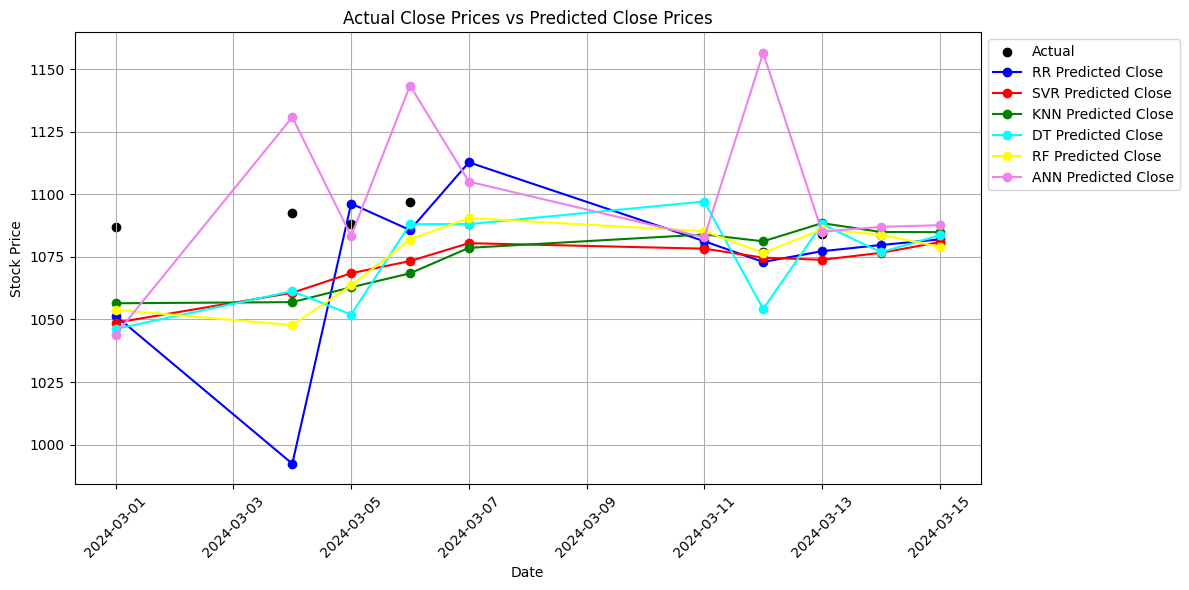

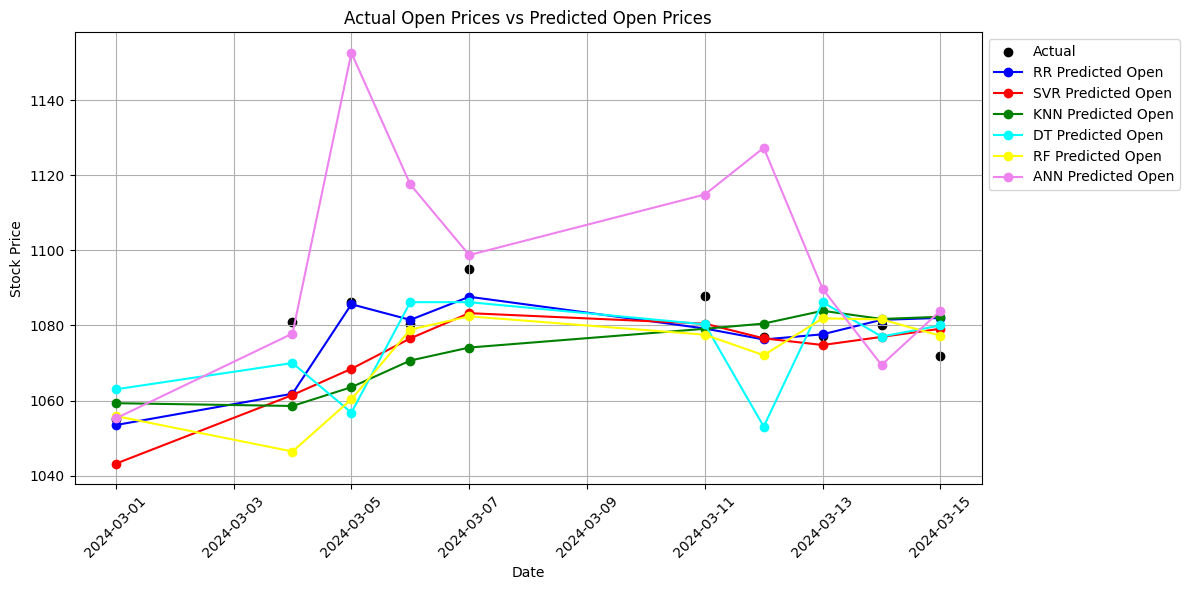

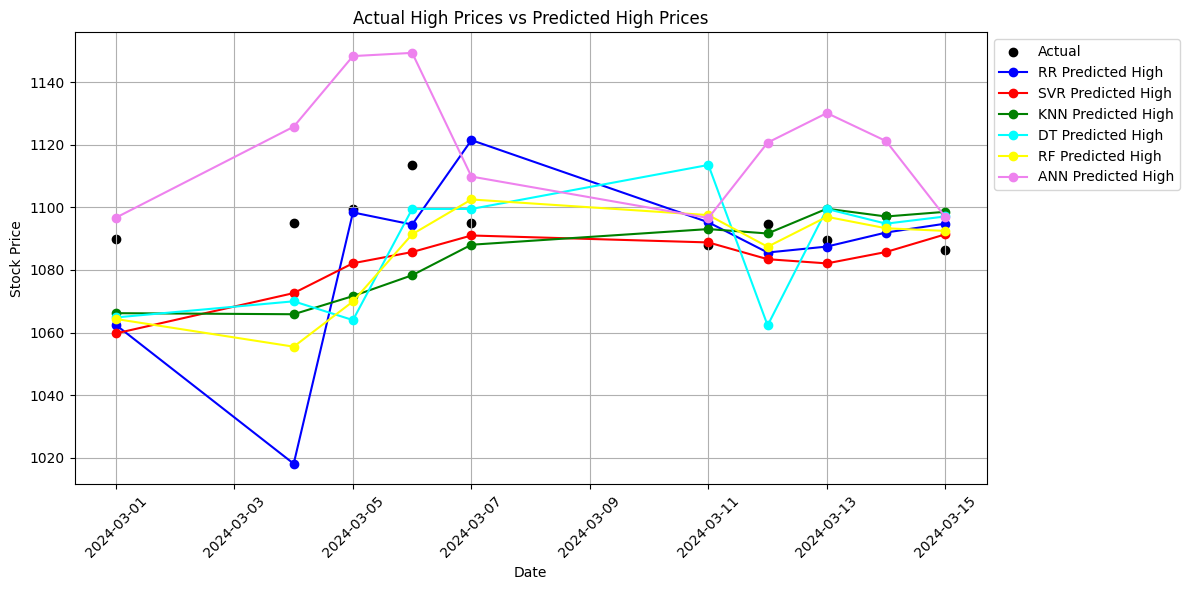

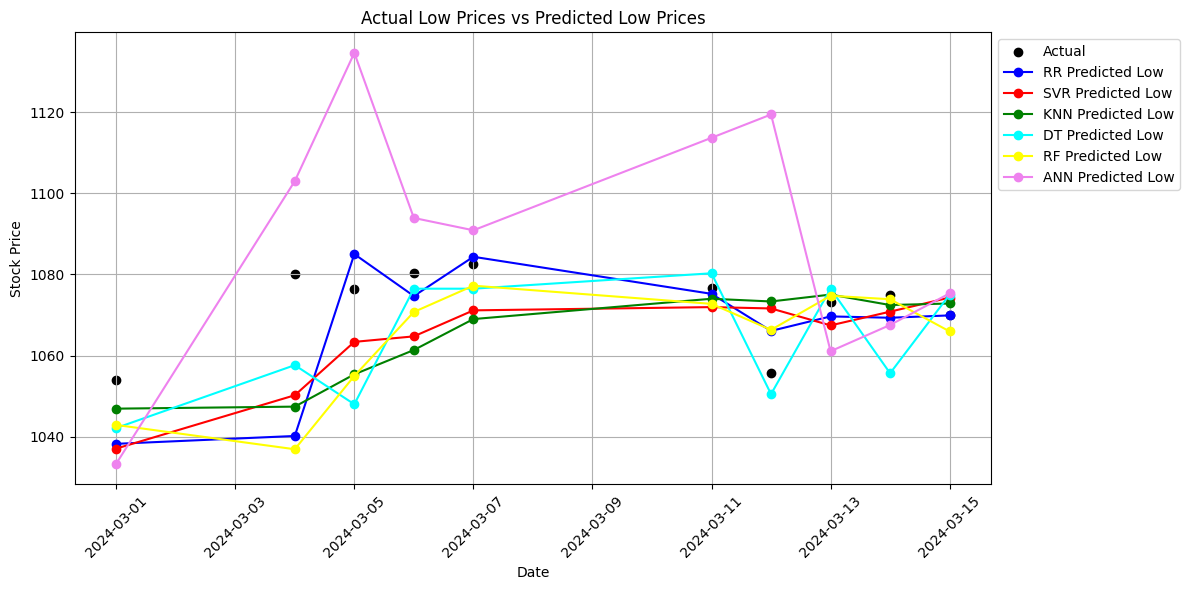

In [50]:
import matplotlib.pyplot as plt

# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Close'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Close'], marker='o', label='RR Predicted Close', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Close'], marker='o', label='SVR Predicted Close', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Close'], marker='o', label='KNN Predicted Close', color='green')
plt.plot(result_df.index, result_df['DT Predicted Close'], marker='o', label='DT Predicted Close', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Close'], marker='o', label='RF Predicted Close', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Close'], marker='o', label='ANN Predicted Close', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close Prices vs Predicted Close Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted open prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Open'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Open'], marker='o', label='RR Predicted Open', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Open'], marker='o', label='SVR Predicted Open', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Open'], marker='o', label='KNN Predicted Open', color='green')
plt.plot(result_df.index, result_df['DT Predicted Open'], marker='o', label='DT Predicted Open', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Open'], marker='o', label='RF Predicted Open', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Open'], marker='o', label='ANN Predicted Open', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Open Prices vs Predicted Open Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted high prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual High'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted High'], marker='o', label='RR Predicted High', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted High'], marker='o', label='SVR Predicted High', color='red')
plt.plot(result_df.index, result_df['KNN Predicted High'], marker='o', label='KNN Predicted High', color='green')
plt.plot(result_df.index, result_df['DT Predicted High'], marker='o', label='DT Predicted High', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted High'], marker='o', label='RF Predicted High', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted High'], marker='o', label='ANN Predicted High', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual High Prices vs Predicted High Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual and predicted low prices
plt.figure(figsize=(12, 6))
plt.scatter(result_df.index, result_df['Actual Low'], marker='o', label='Actual', color='black')
plt.plot(result_df.index, result_df['RR Predicted Low'], marker='o', label='RR Predicted Low', color='blue')
plt.plot(result_df.index, result_df['SVR Predicted Low'], marker='o', label='SVR Predicted Low', color='red')
plt.plot(result_df.index, result_df['KNN Predicted Low'], marker='o', label='KNN Predicted Low', color='green')
plt.plot(result_df.index, result_df['DT Predicted Low'], marker='o', label='DT Predicted Low', color='cyan')
plt.plot(result_df.index, result_df['RF Predicted Low'], marker='o', label='RF Predicted Low', color='yellow')
plt.plot(result_df.index, result_df['ANN Predicted Low'], marker='o', label='ANN Predicted Low', color='violet')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Low Prices vs Predicted Low Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd

# Assuming result_df is your DataFrame with the predicted prices
# Convert the index to a DateTimeIndex
result_df.index = pd.to_datetime(result_df.index)

# Convert the DateTimeIndex to the desired date format
result_df.index = result_df.index.strftime('%Y-%m-%d')

# Create DataFrames with the actual and predicted prices
data_close = {
    'Actual Close': result_df['Actual Close'],
    'RR Predicted Close': result_df['RR Predicted Close'],
    'SVR Predicted Close': result_df['SVR Predicted Close'],
    'KNN Predicted Close': result_df['KNN Predicted Close'],
    'DT Predicted Close': result_df['DT Predicted Close'],
    'RF Predicted Close': result_df['RF Predicted Close'],
    'ANN Predicted Close': result_df['ANN Predicted Close']
}
df_close = pd.DataFrame(data_close)

data_open = {
    'Actual Open': result_df['Actual Open'],
    'RR Predicted Open': result_df['RR Predicted Open'],
    'SVR Predicted Open': result_df['SVR Predicted Open'],
    'KNN Predicted Open': result_df['KNN Predicted Open'],
    'DT Predicted Open': result_df['DT Predicted Open'],
    'RF Predicted Open': result_df['RF Predicted Open'],
    'ANN Predicted Open': result_df['ANN Predicted Open']
}
df_open = pd.DataFrame(data_open)

data_high = {
    'Actual High': result_df['Actual High'],
    'RR Predicted High': result_df['RR Predicted High'],
    'SVR Predicted High': result_df['SVR Predicted High'],
    'KNN Predicted High': result_df['KNN Predicted High'],
    'DT Predicted High': result_df['DT Predicted High'],
    'RF Predicted High': result_df['RF Predicted High'],
    'ANN Predicted High': result_df['ANN Predicted High']
}
df_high = pd.DataFrame(data_high)

data_low = {
    'Actual Low': result_df['Actual Low'],
    'RR Predicted Low': result_df['RR Predicted Low'],
    'SVR Predicted Low': result_df['SVR Predicted Low'],
    'KNN Predicted Low': result_df['KNN Predicted Low'],
    'DT Predicted Low': result_df['DT Predicted Low'],
    'RF Predicted Low': result_df['RF Predicted Low'],
    'ANN Predicted Low': result_df['ANN Predicted Low']
}
df_low = pd.DataFrame(data_low)

# Save the DataFrames to an Excel file
with pd.ExcelWriter('predicted_prices.xlsx') as writer:
    df_close.to_excel(writer, sheet_name='Close Prices')
    df_open.to_excel(writer, sheet_name='Open Prices')
    df_high.to_excel(writer, sheet_name='High Prices')
    df_low.to_excel(writer, sheet_name='Low Prices')
